#Practice Assignment 9.1

(Consider the statement for Q1-Q4)
Load the iris dataset from sklearn.

Remove the rows if it contain NULL values.

Train the model Using Kmeans Clustering by setting the parameter as following:
   "init": "random",    "n_init": 50,    "max_iter": 500,    "random_state": 10

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
iris_data, y = load_iris(as_frame=True, return_X_y=True)
print(iris_data.shape, y.shape, type(iris_data))
# iris_data_df = pd.DataFrame(iris_data, columns=['sepal length', 'sepal width', 'petal length', 'petal width' ])
# iris_data_df.isna().sum()
# iris_data_df.shape

(150, 4) (150,) <class 'pandas.core.frame.DataFrame'>


In [ ]:
kMeans = KMeans(n_clusters=3, init="random", n_init=50, max_iter=500, random_state=10)
kMeans.fit(iris_data)

KMeans(init='random', max_iter=500, n_clusters=3, n_init=50, random_state=10)

Q1) Which feature pair has the highest correlation cofficient value.

In [ ]:
corr_iris = iris_data.corr()
corr_iris.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


In [ ]:
# kMeans.get_params
kMeans.inertia_

78.851441426146

Q2) Enter the value of the ' inertia_' score Keeping k=5

In [ ]:
kMeans = KMeans(n_clusters=5, init="random", n_init=50, max_iter=500, random_state=10)
kMeans.fit(iris_data)
kMeans.inertia_

46.446182051282065

Q3) Plot the elbow chart for the given data by taking k=1 to k=12. At which k value elbow is formed?

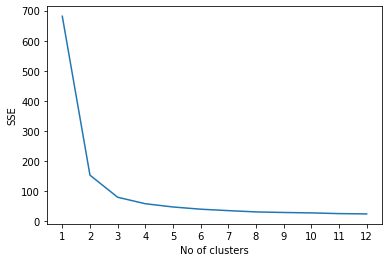

In [ ]:
sse = []
for i in range(1, 13):
  kMeans = KMeans(n_clusters=i, init="random", n_init=50, max_iter=500, random_state=10)
  kMeans.fit(iris_data)
  sse.append(kMeans.inertia_)

plt.plot(range(1, 13), sse)
plt.xticks(range(1,13))
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()

Q4) What is the value of ' inertia_' score at k=3.

In [ ]:
sse[2]

78.851441426146

Load the iris dataset from sklearn.

Remove the rows if it contain NULL values.

Train the model using Agglomerative Clustering by setting the parameter as following

n_clusters=3,affinity='euclidean', linkage='ward'

In [ ]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 
iris_data, y = load_iris(as_frame=True, return_X_y=True)
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit(iris_data)

AgglomerativeClustering(n_clusters=3)

Q5) What is the label predicted for last row of samples

In [ ]:
agg_cluster.labels_[-1]

0

Q6) Enter the number of leaves in the hierarchical tree.

In [ ]:
agg_cluster.n_leaves_

150

#Practice Assignment 9.2

About the dataset:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

dataset - "https://drive.google.com/file/d/10Dj5jGYoqc7T5AMV_jBXJzDQQscHbrQ9/view?usp=sharing"

Instructions for questions 1,2 and 3
Load the diabetes dataset.
Separate features and label.

In [ ]:
diabetic_data = pd.read_csv('/content/sample_data/diabetes.csv')
diabetic_data.shape
diabetic_data.columns
X = diabetic_data[diabetic_data.columns[:-1]]
y = diabetic_data[diabetic_data.columns[-1]]
X.shape, y.shape

((768, 8), (768,))

Q1) Which of the following feature pairs have negative correlation?

In [ ]:
corr = diabetic_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


Q2) Which of the following features has the highest standard deviation?

In [ ]:
diabetic_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Q3) Is there any missing values in the dataset?

In [ ]:
diabetic_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* split the dataset into training and test dataset in 80:20 proportion with "random_state": 1
* Create a pipeline with scaler as StandardScaler and classifier as MLPClassifier.
* Classifier should have the following properties:
  * Classifier should have three hidden layers with 10 neurons each.
  * set activation='relu', solver='sgd', alpha= 1e-4, learning_rate_init= 0.2 ,max_iter=500, random_state=1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', 
                        alpha=1e-4, learning_rate_init=0.2, max_iter=500, random_state=1)
mlp_pipe = Pipeline([('scalar', StandardScaler()),
             ('mlp', mlp_clf)
             ])
mlp_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(10, 10, 10),
                               learning_rate_init=0.2, max_iter=500,
                               random_state=1, solver='sgd'))])

Q4) What will be the mean accuracy of the model on the training data?

In [ ]:
accuracy_score(y_train, mlp_pipe.predict(X_train))

0.7915309446254072

Q5) What will be the mean accuracy of the model on the test data?

In [ ]:
accuracy_score(y_test, mlp_pipe.predict(X_test))

0.7662337662337663

Q6) What is the output activation function used by the classifier?

In [ ]:
mlp_clf.out_activation_

'logistic'

Q7) How many weights (excluding intercepts) between input layer and first hidden layer were learnt by the classifier?

# Graded Assignment - 9 (PART - A)
Data Set Information:

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers. Analyze The variability of consumer engagement on Facebook Live data which can help sellers to build selling approach and activities for the company.



Consider the statement for Q1- Q8) Load the dataset using following link
Url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"
* Check if any feature contains Null values.
* Drop all the features which have Null values.
* Save 'status_type' as target variable.
* Drop the feature "status_id", "status_type" and "status_published" from training set.
* Use LabelEncoder to transform the target variable.
* Use standard scaler to scale the features.
* For Q4,Q5 Train the model using Kmeans clustering (Take Random state=10)
* For Q6,Q7,Q8 Train the model using Agglomerative Clustering by setting the parameter as following
  * n_clusters=4,affinity='euclidean', linkage='ward'

https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv

In [ ]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')
dataset.shape

(7050, 16)

In [ ]:
dataset.isna().sum()
dataset.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)
dataset.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [ ]:
target = dataset['status_type']
target.shape

(7050,)

In [ ]:
target.value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [ ]:
features = dataset.drop(columns=['status_id', 'status_type', 'status_published'], inplace=False)
features.shape

(7050, 9)

In [ ]:
type(target)
target.unique
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
encoded_label = label_enc.fit_transform(target)
np.unique(encoded_label)

array([0, 1, 2, 3])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_fetures = ss.fit_transform(features)

For Q4,Q5 Train the model using Kmeans clustering (Take Random state=10)

Q4) Enter the inertia score at k=2

In [ ]:
kMeans1 = KMeans(n_clusters=2, random_state=10)
kMeans1.fit(scaled_fetures)
kMeans1.inertia_

48278.09824220544

Q5) How many labels were predicted accurately at k=4?

In [ ]:
kMeans2 = KMeans(n_clusters=4, random_state=10)
kMeans2.fit(scaled_fetures)
y_predict = kMeans2.fit_predict(scaled_fetures, encoded_label)
len(np.where(y_predict == encoded_label)[0])

4421

Q6) What is the label predicted for first row of samples.

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agg_cluster1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_cluster1.fit(scaled_fetures)
predictions = agg_cluster1.fit_predict(scaled_fetures, encoded_label)
predictions[0]

3

Q7) Enter the number of leaves in the hierarchical tree.

In [ ]:
agg_cluster1.n_leaves_

7050

Q8) What is the accuracy of the model(in Percentage)?

In [ ]:
accuracy_score(encoded_label, predictions)*100

28.496453900709216

# Graded Assignment - 9 (PART - B)
https://drive.google.com/file/d/1cBPurUshGKrK72SWsCatRHomjMnAWK6f/view?usp=sharing  

The dataset contains 9471 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

Attributes:

* Date (DD/MM/YYYY)
* Time (HH.MM.SS)
* True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
* True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
* True hourly averaged NOx concentration in ppb (reference analyzer)
* PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* Temperature in Â°C
* Relative Humidity (%)
* AH Absolute Humidity

Information for questions 1 and 2 and 3.
* Load the AirQualityUCI dataset.
* Drop 'Date', 'Time', 'Unnamed: 15', 'Unnnamed: 16' columns.
* Drop all the rows which has at-least one missing value.

In [ ]:
air_quality_data = pd.read_csv('/content/sample_data/AirQualityUCI.csv')
print(air_quality_data.shape)
air_quality_data.columns
air_quality_data.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], inplace=True)

(9471, 17)


In [ ]:
air_quality_data.isna().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
air_quality_data_final = air_quality_data.dropna(axis=0)
print(air_quality_data_final.shape)
air_quality_data_final.isna().sum()

(9357, 13)


CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Q1) What is the shape of the dataset after dropping the rows and colums as mentioned above?

In [ ]:
air_quality_data_final.shape

(9357, 13)

Q2) The task is to predict the absolute humidity at a particular time based on other features. So, we will have AH as the target variable. Under which category does this task fall?

In [ ]:
air_quality_data_final.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Q3) What is the value of correlation co-efficient between temperature (T) and relative humidity (RH)?

In [ ]:
corr = air_quality_data_final.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.0000,0.0414,0.1284,-0.0314,0.0299,0.5265,-0.0900,0.6711,-0.0737,0.0803,-0.0689,-0.0482,-0.0459
PT08.S1(CO),0.0414,1.0000,0.1700,0.8527,0.9331,0.2780,0.0870,0.1540,0.8451,0.8924,0.7548,0.7454,0.7649
NMHC(GT),0.1284,0.1700,1.0000,0.0373,0.1101,-0.0044,0.0488,0.1033,0.1627,0.1012,-0.0000,0.0083,0.0125
C6H6(GT),-0.0314,0.8527,0.0373,1.0000,0.7674,-0.0012,0.5122,-0.0110,0.7747,0.6413,0.9714,0.9251,0.9846
PT08.S2(NMHC),0.0299,0.9331,0.1101,0.7674,1.0000,0.3313,-0.0737,0.1765,0.8748,0.9099,0.6690,0.5858,0.6466
NOx(GT),0.5265,0.2780,-0.0044,-0.0012,0.3313,1.0000,-0.4361,0.8171,0.0355,0.4619,-0.1385,-0.0530,-0.0958
PT08.S3(NOx),-0.0900,0.0870,0.0488,0.5122,-0.0737,-0.4361,1.0000,-0.2562,0.1227,-0.2089,0.5881,0.5735,0.6216
NO2(GT),0.6711,0.1540,0.1033,-0.0110,0.1765,0.8171,-0.2562,1.0000,-0.0222,0.2534,-0.0841,-0.0813,-0.0604
PT08.S4(NO2),-0.0737,0.8451,0.1627,0.7747,0.8748,0.0355,0.1227,-0.0222,1.0000,0.7237,0.7551,0.6407,0.6919
PT08.S5(O3),0.0803,0.8924,0.1012,0.6413,0.9099,0.4619,-0.2089,0.2534,0.7237,1.0000,0.5037,0.5250,0.5195


* Separate features and target variable.
* split the dataset into training and test dataset in 80:20 proportion with "random_state=1"
* Create a pipeline with scaler as StandardScaler and classifier as MLPRegressor.
* Classifier should have the following properties:
* Classifier should have three hidden layers with 50 neurons each.
  * set tol=1e-2, alpha=1e-4,solver="adam", learning_rate_init=0.1, max_iter=50, random_state=1

In [ ]:
air_target = air_quality_data_final['AH']
print(target.shape)
air_features = air_quality_data_final.drop(columns=['AH'])
print(air_features.shape)

(9357,)
(9357, 12)


In [ ]:
from sklearn.neural_network import MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(air_features, air_target, test_size=0.2, random_state=1)
mlp_reg = MLPRegressor(hidden_layer_sizes=(50,50,50), tol=1e-2, alpha=1e-4, solver='adam',
                       learning_rate_init=0.1, max_iter=50, random_state=1)
air_pipe = Pipeline([('scaler', StandardScaler()),
                     ('mlp_reg', mlp_reg)
                     ])
air_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp_reg',
                 MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                              learning_rate_init=0.1, max_iter=50,
                              random_state=1, tol=0.01))])

Q4) How many samples are there in the test dataset?

In [ ]:
X_test.shape, y_test.shape

((1872, 12), (1872,))

Q5) What is the value of coefficient of determination of the prediction on the training dataset?

In [ ]:
# predictions = air_pipe.predict(X_train)
train_score = air_pipe.score(X_train, y_train)
print(train_score)

0.999992602958679


Q6) What is the value of coefficient of determination of the prediction on the test dataset?

In [ ]:
test_score = air_pipe.score(X_test, y_test)
print(test_score)

0.9999920781245708


Q7) What will be the prediction of the model on the first intance of training set?

In [ ]:
predictions = air_pipe.predict(X_train)
print(predictions[0])

1.5977531509180736
